# Packages

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET

## LOAD TRAIN

In [75]:
train =  pd.read_csv('MLUnige2023_subscriptions_train.csv', index_col='Id', na_values='na', header=0)

train = train.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'bool', 'X2':'bool', 'X3':'bool', 'X4':'float64', 'subscription':'category', 'day':'category', 'month':'category'})

train.day = pd.Categorical(train.day, ordered=True)

train.month = pd.Categorical(train.month, ordered=True)

train


,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,False,False,True,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,False,False,False,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,NaN,False,True,True,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,False,False,True,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,False,False,False,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,NaN,True,False,False,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,NaN,False,False,True,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,-1,NaN,False,False,True,0.079186,1


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8952 non-null   int64   
 1   job               8891 non-null   category
 2   marital           8952 non-null   category
 3   education         8574 non-null   category
 4   device            6902 non-null   category
 5   day               8952 non-null   category
 6   month             8952 non-null   category
 7   time_spent        8952 non-null   float64 
 8   banner_views      8952 non-null   int64   
 9   banner_views_old  8952 non-null   int64   
 10  days_elapsed_old  8952 non-null   int64   
 11  outcome_old       2148 non-null   category
 12  X1                8952 non-null   bool    
 13  X2                8952 non-null   bool    
 14  X3                8952 non-null   bool    
 15  X4                8952 non-null   float64 
 16  subscription      8952 n

## MISSING TRAIN

In [77]:
missing_values = train.isnull().mean()

print(missing_values)

age                 0.000000
job                 0.006814
marital             0.000000
education           0.042225
device              0.228999
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.760054
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
subscription        0.000000
dtype: float64


## LOAD TEST

In [78]:
test = pd.read_csv('MLUnige2023_subscriptions_test.csv', index_col='Id', na_values='na', header=0)

test = test.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'bool', 'X2':'bool', 'X3':'bool', 'X4':'float64', 'day':'category', 'month':'category'})

test.day = pd.Categorical(test.day, ordered=True)

test.month = pd.Categorical(test.month, ordered=True)

test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,-1,NaN,False,False,True,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,-1,NaN,False,False,False,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,-1,NaN,False,False,False,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,-1,NaN,False,False,True,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,-1,NaN,False,False,False,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,-1,NaN,False,False,True,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,-1,NaN,True,False,False,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,-1,NaN,False,False,True,0.129156


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3837 non-null   int64   
 1   job               3816 non-null   category
 2   marital           3837 non-null   category
 3   education         3677 non-null   category
 4   device            2936 non-null   category
 5   day               3837 non-null   category
 6   month             3837 non-null   category
 7   time_spent        3837 non-null   float64 
 8   banner_views      3837 non-null   int64   
 9   banner_views_old  3837 non-null   int64   
 10  days_elapsed_old  3837 non-null   int64   
 11  outcome_old       900 non-null    category
 12  X1                3837 non-null   bool    
 13  X2                3837 non-null   bool    
 14  X3                3837 non-null   bool    
 15  X4                3837 non-null   float64 
dtypes: bool(3), category(7),

## MISSING TEST

In [80]:
missing_values = test.isnull().mean()

print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.000000
outcome_old         0.765442
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


## NA VALUES TRAIN

In [81]:
train['days_elapsed_old'] = train['days_elapsed_old'].replace(-1, np.nan)
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196.0,failure,False,False,True,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79.0,success,False,False,False,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,NaN,NaN,False,True,True,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369.0,other,False,False,True,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143.0,success,False,False,False,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,NaN,NaN,True,False,False,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,NaN,NaN,False,False,True,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,NaN,NaN,False,False,True,0.079186,1


In [82]:
train['X1'] = train['X1'].astype(int)
train['X2'] = train['X2'].astype(int)
train['X3'] = train['X3'].astype(int)

train = train.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'subscription':'category', 'day':'category', 'month':'category'})

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8952 non-null   int64   
 1   job               8891 non-null   category
 2   marital           8952 non-null   category
 3   education         8574 non-null   category
 4   device            6902 non-null   category
 5   day               8952 non-null   category
 6   month             8952 non-null   category
 7   time_spent        8952 non-null   float64 
 8   banner_views      8952 non-null   int64   
 9   banner_views_old  8952 non-null   int64   
 10  days_elapsed_old  2149 non-null   float64 
 11  outcome_old       2148 non-null   category
 12  X1                8952 non-null   category
 13  X2                8952 non-null   category
 14  X3                8952 non-null   category
 15  X4                8952 non-null   float64 
 16  subscription      8952 n

In [83]:
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196.0,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79.0,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,NaN,NaN,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369.0,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143.0,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,NaN,NaN,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,NaN,NaN,0,0,1,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,NaN,NaN,0,0,1,0.079186,1


## MISSING TRAIN

In [84]:
missing_values = train.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.006814
marital             0.000000
education           0.042225
device              0.228999
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.759942
outcome_old         0.760054
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
subscription        0.000000
dtype: float64


## DROP DAY_ELAPSED_OLD AND OUTCOME_OLD TRAIN

In [85]:
train = train.drop(columns=['days_elapsed_old', 'outcome_old'])

## MISSING TRAIN

In [86]:
missing_values = train.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.006814
marital             0.000000
education           0.042225
device              0.228999
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
subscription        0.000000
dtype: float64


## NA VALUES TEST

In [87]:
test['days_elapsed_old'] = test['days_elapsed_old'].replace(-1, np.nan)

In [88]:
test['X1'] = test['X1'].astype(int)
test['X2'] = test['X2'].astype(int)
test['X3'] = test['X3'].astype(int)

test = test.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'day':'category', 'month':'category'})

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3837 non-null   int64   
 1   job               3816 non-null   category
 2   marital           3837 non-null   category
 3   education         3677 non-null   category
 4   device            2936 non-null   category
 5   day               3837 non-null   category
 6   month             3837 non-null   category
 7   time_spent        3837 non-null   float64 
 8   banner_views      3837 non-null   int64   
 9   banner_views_old  3837 non-null   int64   
 10  days_elapsed_old  902 non-null    float64 
 11  outcome_old       900 non-null    category
 12  X1                3837 non-null   category
 13  X2                3837 non-null   category
 14  X3                3837 non-null   category
 15  X4                3837 non-null   float64 
dtypes: category(10), float64

In [89]:
test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,NaN,NaN,0,0,1,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,NaN,NaN,0,0,0,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,NaN,NaN,0,0,0,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,NaN,NaN,0,0,1,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,NaN,NaN,0,0,0,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,NaN,NaN,0,0,1,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,NaN,NaN,1,0,0,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,NaN,NaN,0,0,1,0.129156


## MISSING TEST

In [90]:
missing_values = test.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
days_elapsed_old    0.764921
outcome_old         0.765442
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


## DROP DAYS_ELAPSED_OLD AND OUTCOME_OLD TEST


In [91]:
test = test.drop(columns=['days_elapsed_old', 'outcome_old'])

## MISSING TEST

In [92]:
missing_values = test.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


## CATEGORICAL VS NUMERICAL COLUMNS

In [93]:
categorical_columns = train.select_dtypes(include=["category","bool", "object"])
categorical_columns_names = list(categorical_columns.columns)
numerical_columns = train.select_dtypes(exclude=["category","bool", "object"])
numerical_columns_names = list(numerical_columns)

print("Numerical:",numerical_columns_names, "\nCategory:",categorical_columns_names)

Numerical: ['age', 'time_spent', 'banner_views', 'banner_views_old', 'X4'] 
Category: ['job', 'marital', 'education', 'device', 'day', 'month', 'X1', 'X2', 'X3', 'subscription']


## REMOVING NA

In [94]:
train = train.dropna()

In [95]:
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,32,unemployed,single,university,smartphone,2,8,23.80,1,2,0,0,0,0.148194,0
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,0,0,1,0.081456,1


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6607 entries, 0 to 8951
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               6607 non-null   int64   
 1   job               6607 non-null   category
 2   marital           6607 non-null   category
 3   education         6607 non-null   category
 4   device            6607 non-null   category
 5   day               6607 non-null   category
 6   month             6607 non-null   category
 7   time_spent        6607 non-null   float64 
 8   banner_views      6607 non-null   int64   
 9   banner_views_old  6607 non-null   int64   
 10  X1                6607 non-null   category
 11  X2                6607 non-null   category
 12  X3                6607 non-null   category
 13  X4                6607 non-null   float64 
 14  subscription      6607 non-null   category
dtypes: category(10), float64(2), int64(3)
memory usage: 377.1 KB


In [97]:
missing_values = train.isnull().mean()
print(missing_values)

age                 0.0
job                 0.0
marital             0.0
education           0.0
device              0.0
day                 0.0
month               0.0
time_spent          0.0
banner_views        0.0
banner_views_old    0.0
X1                  0.0
X2                  0.0
X3                  0.0
X4                  0.0
subscription        0.0
dtype: float64


In [98]:
test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,0,0,1,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,0,0,0,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,0,0,0,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,0,0,1,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,0,0,0,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,0,0,1,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,1,0,0,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,0,0,1,0.129156


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3837 non-null   int64   
 1   job               3816 non-null   category
 2   marital           3837 non-null   category
 3   education         3677 non-null   category
 4   device            2936 non-null   category
 5   day               3837 non-null   category
 6   month             3837 non-null   category
 7   time_spent        3837 non-null   float64 
 8   banner_views      3837 non-null   int64   
 9   banner_views_old  3837 non-null   int64   
 10  X1                3837 non-null   category
 11  X2                3837 non-null   category
 12  X3                3837 non-null   category
 13  X4                3837 non-null   float64 
dtypes: category(9), float64(2), int64(3)
memory usage: 216.4 KB


In [100]:
missing_values = test.isnull().mean()
print(missing_values)

age                 0.000000
job                 0.005473
marital             0.000000
education           0.041699
device              0.234819
day                 0.000000
month               0.000000
time_spent          0.000000
banner_views        0.000000
banner_views_old    0.000000
X1                  0.000000
X2                  0.000000
X3                  0.000000
X4                  0.000000
dtype: float64


# SCALING

In [102]:
train_num = train[numerical_columns_names]
train_cat = train[categorical_columns_names]

test_num = test[numerical_columns_names]
test_cat = test[categorical_columns_names[:-1]]

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the scaler on the numerical variables
scaler.fit(train_num)
train_num = pd.DataFrame(scaler.transform(train_num), columns=train_num.columns, index=train_num.index)
test_num = pd.DataFrame(scaler.transform(test_num),columns=test_num.columns, index=test_num.index)

# merge again 
train = pd.merge(train_num, train_cat, how="left", on=["Id"])
test = pd.merge(test_num, test_cat, how="left", on=["Id"])

In [104]:
train

,age,time_spent,banner_views,banner_views_old,X4,job,marital,education,device,day,month,X1,X2,X3,subscription
Id,,,,,,,,,,,,,,,
0,-1.099928,0.572138,0.203390,1.276111,-0.450964,freelance,married,grad_school,smartphone,4,2,0,0,1,1
1,0.555193,-0.254284,-0.571357,0.006597,-0.368693,industrial_worker,married,university,smartphone,30,4,0,0,0,1
2,-1.182684,-0.551796,0.203390,-0.416574,-0.596628,teacher,married,university,smartphone,14,7,0,1,1,0
3,0.224169,-0.611899,-0.183983,0.006597,0.142962,unemployed,divorced,university,smartphone,13,5,0,0,1,0
4,-1.017172,-0.082989,-0.183983,0.429768,-0.043837,manager,single,grad_school,smartphone,26,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,-0.768904,0.391828,-0.571357,0.429768,1.888677,unemployed,single,university,smartphone,2,8,0,0,0,0
8947,1.051730,-0.599878,-0.571357,-0.416574,-0.450964,industrial_worker,married,university,smartphone,16,7,1,0,0,0
8948,0.141413,1.230271,-0.183983,-0.416574,-0.182457,industrial_worker,married,university,smartphone,4,2,0,0,1,1


In [103]:
test

,age,time_spent,banner_views,banner_views_old,X4,job,marital,education,device,day,month,X1,X2,X3
Id,,,,,,,,,,,,,,
0,0.968974,-0.723090,-0.571357,-0.416574,-0.085817,retired,married,university,NaN,17,6,0,0,1
1,1.631022,-0.497703,-0.571357,-0.416574,-0.375737,manager,married,grad_school,smartphone,20,4,0,0,0
2,0.803461,-0.458635,-0.571357,-0.416574,-0.358550,industrial_worker,married,university,NaN,4,7,0,0,0
3,-0.603391,-0.230242,-0.183983,-0.416574,-0.536615,manager,married,grad_school,NaN,28,5,0,0,1
4,-0.934416,-0.067963,-0.183983,-0.416574,2.615589,manager,married,grad_school,smartphone,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.472437,0.115352,-0.183983,-0.416574,0.523887,industrial_worker,married,NaN,NaN,5,6,0,0,1
3833,-0.934416,-0.819256,-0.571357,-0.416574,-0.303609,teacher,single,university,smartphone,3,3,1,0,0
3834,1.134486,-0.729101,0.978137,-0.416574,1.297850,teacher,married,university,NaN,26,6,0,0,1


## HOT-ENCODING

In [105]:
train_hot = pd.get_dummies(train, columns=['job','marital','education','device','day','month'])
test_hot = pd.get_dummies(test, columns=['job','marital','education','device','day','month'])

### TRAIN

In [106]:
train_hot

,age,time_spent,banner_views,banner_views_old,X4,X1,X2,X3,subscription,job_entrepreneur,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Id,,,,,,,,,,,,,,,,,,,,,
0,-1.099928,0.572138,0.203390,1.276111,-0.450964,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.555193,-0.254284,-0.571357,0.006597,-0.368693,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.182684,-0.551796,0.203390,-0.416574,-0.596628,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.224169,-0.611899,-0.183983,0.006597,0.142962,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-1.017172,-0.082989,-0.183983,0.429768,-0.043837,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,-0.768904,0.391828,-0.571357,0.429768,1.888677,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8947,1.051730,-0.599878,-0.571357,-0.416574,-0.450964,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8948,0.141413,1.230271,-0.183983,-0.416574,-0.182457,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
train_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6607 entries, 0 to 8951
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    6607 non-null   float64 
 1   time_spent             6607 non-null   float64 
 2   banner_views           6607 non-null   float64 
 3   banner_views_old       6607 non-null   float64 
 4   X4                     6607 non-null   float64 
 5   X1                     6607 non-null   category
 6   X2                     6607 non-null   category
 7   X3                     6607 non-null   category
 8   subscription           6607 non-null   category
 9   job_entrepreneur       6607 non-null   uint8   
 10  job_freelance          6607 non-null   uint8   
 11  job_housekeeper        6607 non-null   uint8   
 12  job_industrial_worker  6607 non-null   uint8   
 13  job_manager            6607 non-null   uint8   
 14  job_retired            6607 non-null   u

### TEST

In [108]:
test_hot

,age,time_spent,banner_views,banner_views_old,X4,X1,X2,X3,job_entrepreneur,job_freelance,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Id,,,,,,,,,,,,,,,,,,,,,
0,0.968974,-0.723090,-0.571357,-0.416574,-0.085817,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.631022,-0.497703,-0.571357,-0.416574,-0.375737,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.803461,-0.458635,-0.571357,-0.416574,-0.358550,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.603391,-0.230242,-0.183983,-0.416574,-0.536615,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.934416,-0.067963,-0.183983,-0.416574,2.615589,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.472437,0.115352,-0.183983,-0.416574,0.523887,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3833,-0.934416,-0.819256,-0.571357,-0.416574,-0.303609,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3834,1.134486,-0.729101,0.978137,-0.416574,1.297850,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [109]:
test_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3836
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    3837 non-null   float64 
 1   time_spent             3837 non-null   float64 
 2   banner_views           3837 non-null   float64 
 3   banner_views_old       3837 non-null   float64 
 4   X4                     3837 non-null   float64 
 5   X1                     3837 non-null   category
 6   X2                     3837 non-null   category
 7   X3                     3837 non-null   category
 8   job_entrepreneur       3837 non-null   uint8   
 9   job_freelance          3837 non-null   uint8   
 10  job_housekeeper        3837 non-null   uint8   
 11  job_industrial_worker  3837 non-null   uint8   
 12  job_manager            3837 non-null   uint8   
 13  job_retired            3837 non-null   uint8   
 14  job_salesman           3837 non-null   u

## DROPPING SUBSCRIPTION FOR PREDICTIONS

In [110]:
train_no_subscription = train_hot.drop('subscription', axis=1)
train_only_subscription = train_hot['subscription']

# TRAIN, TEST AND VALIDATION

In [111]:
valid_size = 0.3

# Split the data into training and test sets
X_train, X_valid, Y_train, Y_valid = train_test_split(train_no_subscription, train_only_subscription, test_size=valid_size)

In [112]:
Cond1 = X_train.shape[0] == Y_train.shape[0]

Cond2 = X_valid.shape[0] == Y_valid.shape[0]

print("\nSame Size ?","\n\nFor Training:",Cond1,", For Validation:", Cond2)

PropTV = (X_valid.shape[0]/X_train.shape[0])*100

print("\nProportions between Training and Validation:", round(PropTV,2),"%")


Same Size ? 

For Training: True , For Validation: True

Proportions between Training and Validation: 42.88 %


# PREDICTIVE MODELS

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

## RANDOM FORESTS

### NO TUNING

In [124]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
  
# predict the mode
y_pred = model.predict(X_valid)
  
# performance evaluatio metrics
print(classification_report(y_pred, Y_valid))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       969
           1       0.88      0.83      0.85      1014

    accuracy                           0.85      1983
   macro avg       0.85      0.85      0.85      1983
weighted avg       0.85      0.85      0.85      1983



### TUNING

In [126]:

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [128]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, Y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [130]:
model_random = RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)
model_random.fit(X_train, Y_train)
y_pred_rand = model.predict(X_valid)
print(classification_report(y_pred_rand, Y_valid))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       969
           1       0.88      0.83      0.85      1014

    accuracy                           0.85      1983
   macro avg       0.85      0.85      0.85      1983
weighted avg       0.85      0.85      0.85      1983



## BAGGING

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

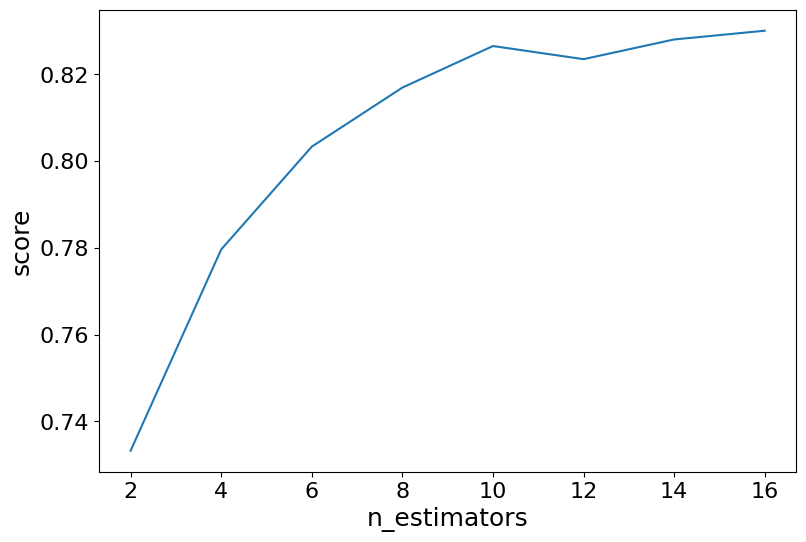

In [134]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, Y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = Y_valid, y_pred = clf.predict(X_valid)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

## XGBoost

In [135]:
import xgboost as xgb

# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
xgb_classifier.fit(X_train, Y_train)

# Convert the model to a native API model
model = xgb_classifier.get_booster()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:X1: category, X2: category, X3: category

# KAGGLE


## TEST